Інсталюємо Pillow

In [104]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


Перевіряємо чи встановлено

In [105]:
from PIL import Image
print("Pillow version:", Image.__version__)

Pillow version: 10.3.0


Встановлюємо OpenCV

In [106]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Перевірка встановлення бібліотеки

In [107]:
import cv2
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


Працюємо з Pillow. Розмиття

In [108]:
from PIL import Image, ImageFilter

# Завантаження зображення
img = Image.open('img.jpg')
img.show()

In [109]:
# Застосування середнього розмиття (Box Blur) 
radius = 1  # радіус вікна
box_blur_img = img.filter(ImageFilter.BoxBlur(radius))
box_blur_img.show()
box_blur_img.save('box_blur1_pillow.jpg')

Імпортуємо необхідні біблоітеки для вимірів часу і пам'яті

In [110]:
import time
import tracemalloc

def measure_performance(operation, *args, **kwargs):
    """
    Вимірює час виконання та використання пам'яті для заданої операції.

    :param operation: Функція, яка виконує операцію
    :param args: Аргументи для операції
    :param kwargs: Іменовані аргументи для операції
    :return: Результат операції, час виконання у мс, використання пам'яті у КБ
    """
    # Початок вимірювання
    start_time = time.perf_counter()
    tracemalloc.start()

    result = operation(*args, **kwargs)

    # Кінець вимірювання
    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    execution_time = (end_time - start_time) * 1000  # мілісекунди
    memory_usage = peak / 10**3  # у кілобайтах

    return result, execution_time, memory_usage

In [111]:
# Застосування середнього розмиття (Box Blur)
radius = 3  # радіус вікна
box_blur_img = img.filter(ImageFilter.BoxBlur(radius))
box_blur_img.show()
box_blur_img.save('box_blur3_pillow.jpg')

Фільтр Лапласа

In [112]:
from PIL import Image, ImageFilter
import numpy as np

# Завантаження зображення
img = Image.open('img.jpg').convert('L')  # Конвертуємо в градації сірого
img.show()
img.save('imgGrey.jpg')

In [113]:
# Ядро Лапласа
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Застосування фільтра Лапласа
laplacian_img = img.filter(ImageFilter.Kernel((3, 3), laplacian_kernel.flatten(), scale=1, offset=0))

# Збереження та показ результату
laplacian_img.show()
laplacian_img.save('laplacian_sharpen_pillow.jpg')

Налаштування контурів

In [114]:
from PIL import Image, ImageFilter

# Завантаження зображення
img = Image.open('img.jpg')

# Застосування Unsharp Mask
alpha = 1.5
gaussian_blur_img = img.filter(ImageFilter.GaussianBlur(2))
unsharp_mask_img = Image.blend(img, gaussian_blur_img, alpha=-alpha)

# Збереження та показ результату
unsharp_mask_img.show()
unsharp_mask_img.save('unsharp_mask_pillow.jpg')

Гаусівське розмиття

In [115]:
from PIL import Image, ImageFilter

# Завантаження зображення
img = Image.open('img.jpg')

# Застосування Gaussian Blur
sigma = 2  # Стандартне відхилення
gaussian_blur_img = img.filter(ImageFilter.GaussianBlur(radius=sigma))

# Збереження та показ результату
gaussian_blur_img.show()
gaussian_blur_img.save('gaussian_blur_pillow.jpg')

Тепер OpenCV. Середнє розмиття

In [116]:
import cv2

# Завантаження зображення
img = cv2.imread('img.jpg')

# Застосування середнього розмиття (Box Blur)
kernel_size = (7, 7)  # розмір ядра (вікна), 2*k+1, де k = 3
box_blur_img = cv2.blur(img, kernel_size)

# Збереження та показ результату
cv2.imshow('Box Blur Image', box_blur_img)
cv2.imwrite('box_blur_opencv.jpg', box_blur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Фільтра Лапласа на OpenCV

In [117]:
import cv2

# Завантаження зображення
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Застосування фільтра Лапласа
laplacian_img = cv2.Laplacian(img, cv2.CV_64F)
laplacian_img = cv2.convertScaleAbs(laplacian_img)

# Збереження та показ результату
cv2.imshow('Laplacian Sharpen', laplacian_img)
cv2.imwrite('laplacian_sharpen_opencv.jpg', laplacian_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Налаштування контурів OpenCV

In [118]:
import cv2

# Завантаження зображення
img = cv2.imread('img.jpg')

# Застосування Gaussian Blur
gaussian_blur_img = cv2.GaussianBlur(img, (7, 7), 10.0)

# Налаштування контурів (Unsharp Masking)
alpha = 1.5
unsharp_mask_img = cv2.addWeighted(img, 1 + alpha, gaussian_blur_img, -alpha, 0)

# Збереження та показ результату
cv2.imshow('Unsharp Mask', unsharp_mask_img)
cv2.imwrite('unsharp_mask_opencv.jpg', unsharp_mask_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Гаусівське розмиття OpenCV

In [119]:
import cv2

# Завантаження зображення
img = cv2.imread('img.jpg')

# Застосування Gaussian Blur
sigma = 2  # Стандартне відхилення
gaussian_blur_img = cv2.GaussianBlur(img, (0, 0), sigma)

# Збереження та показ результату
cv2.imshow('Gaussian Blur', gaussian_blur_img)
cv2.imwrite('gaussian_blur_opencv.jpg', gaussian_blur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Перейдемо до Алгоритмів детекції країв(оператор Собеля і алгоритм Кенні)

Pillow не має вбудованої функції для оператора Собеля, тому доведеться реалізувати його вручну (або використовувати бібліотеку NumPy для обчислення.

In [120]:
from PIL import Image, ImageFilter
import numpy as np

# Напишемо функцію перетворенн зображення
def sobel_filter(image):
    # Перетворення зобраення в градації сірого
    gray_img = image.convert('L')
    img_array = np.array(gray_img)

    # Ядра Собеля
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Обчислення градієнтів
    Ix = np.abs(np.convolve(img_array.flatten(), Kx.flatten(), 'same').reshape(img_array.shape))
    Iy = np.abs(np.convolve(img_array.flatten(), Ky.flatten(), 'same').reshape(img_array.shape))

    # Обчислення величини градієнта
    G = np.sqrt(Ix**2 + Iy**2)

    return Image.fromarray(G.astype(np.uint8))

# Завантаження зображення
img = Image.open('img.jpg')

# Застосування оператора Собеля
sobel_img = sobel_filter(img)

# Збереження та показ результату
sobel_img.show()
sobel_img.save('sobel_pillow.jpg')

OpenCV має вбудовані функції для застосування оператора Собеля

In [121]:
import cv2
import numpy as np

# Завантаження зображення
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Застосування оператора Собеля
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Обчислення величини градієнта
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Перетворення результату до типу uint8
sobel = np.uint8(sobel)

# Збереження та показ результату
cv2.imshow('Sobel', sobel)
cv2.imwrite('sobel_opencv.jpg', sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

Так як алгоритм Кенні складається з кількох етапів і вони не реалізовані у Pillow, а у OpenCV вони є, то використаємо лише 2-гу біблоітеку

In [122]:
import cv2

# Завантаження зображення
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Застосування алгоритму Кенні
edges = cv2.Canny(img, 100, 200)

# Збереження та показ результату
cv2.imshow('Canny', edges)
cv2.imwrite('canny_opencv.jpg', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Переходимо до алгоритмів трансформації зображень. Масштабування за допомогою Pillow

In [123]:
from PIL import Image

# Завантаження зображення
image_path = 'img.jpg'
img = Image.open(image_path)

# Масштабування
scale_x = 3  # Масштабний коефіцієнт по ширині
scale_y = 3  # Масштабний коефіцієнт по висоті
new_size = (int(img.width * scale_x), int(img.height * scale_y))
resized_img = img.resize(new_size, Image.Resampling.LANCZOS)

# Збереження та показ результату
resized_img.show()
resized_img.save('resized_pillow.jpg')
# Було 481*480 стало 1443*1440

Реалізація на OpenCV

In [124]:
import cv2

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)

# Масштабування
scale_x = 3  # Масштабний коефіцієнт по ширині
scale_y = 3  # Масштабний коефіцієнт по висоті
resized_img = cv2.resize(img, (0, 0), fx=scale_x, fy=scale_y)

# Збереження та показ результату
cv2.imshow('Resized Image - OpenCV', resized_img)
cv2.imwrite('resized_opencv.jpg', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Повороти (Rotation). Cпочатку Pillow

In [125]:
from PIL import Image

# Завантаження зображення
image_path = 'img.jpg'
img = Image.open(image_path)

# Поворот
angle = 45  # Кут повороту
rotated_img = img.rotate(angle, expand=True)

# Збереження та показ результату
rotated_img.show()
rotated_img.save('rotated_pillow.jpg')

Поворот на OpenCV

In [126]:
import cv2

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)

# Поворот
angle = 45  # Кут повороту
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, M, (w, h))

# Збереження та показ результату
cv2.imshow('Rotated Image - OpenCV', rotated_img)
cv2.imwrite('rotated_opencv.jpg', rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Перспективні трансформації. Pillow

In [127]:
from PIL import Image, ImageDraw

def find_coeffs(pa, pb):
    # Функція для обчислення коефіцієнтів перспективної трансформації
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float64)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

# Завантаження зображення
img = Image.open('img.jpg')
width, height = img.size

# Визначення початкових і кінцевих точок
original_points = [(0, 0), (width, 0), (width, height), (0, height)]
new_points = [(width*0.1, height*0.2), (width*0.9, height*0.1), (width*0.8, height*0.9), (width*0.2, height*0.8)]

# Знаходимо коефіцієнти для перспективної трансформації
coeffs = find_coeffs(new_points, original_points)

# Застосовуємо перспективну трансформацію
result = img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.Resampling.BICUBIC)

# Збереження та показ результату
result.show()
result.save('perspective_transformed.jpg')

Перспективні трансфорації. OpenCV

In [128]:
import cv2
import numpy as np

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)

pts1 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])  
pts2 = np.float32([[width*0.1, height*0.2], [width*0.9, height*0.1], [width*0.8, height*0.9], [width*0.2, height*0.8]])
M = cv2.getPerspectiveTransform(pts1, pts2)
warped_img = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

# Збереження та показ результату
cv2.imshow('Perspective Transformed Image - OpenCV', warped_img)
cv2.imwrite('perspective_transformed_cv.jpg', warped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Тепер вимірюємо час і використану пам'ять для всіх операцій 

Функція вимірювання часу і пам'яті

In [161]:
import time
import tracemalloc

def measure_performance(operation, *args, **kwargs):
    """
    Вимірює час виконання та використання пам'яті для заданої операції.

    :param operation: Функція, яка виконує операцію
    :param args: Аргументи для операції
    :param kwargs: Іменовані аргументи для операції
    :return: Результат операції, час виконання у мс, використання пам'яті у КБ
    """
    # Початок вимірювання
    start_time = time.perf_counter()
    tracemalloc.start()

    result = operation(*args, **kwargs)

    # Кінець вимірювання
    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    execution_time = (end_time - start_time) * 1000  # мілісекунди
    memory_usage = peak / 10**3  # у кілобайтах

    return result, execution_time, memory_usage

In [129]:
def apply_box_blur(img, radius):
    return img.filter(ImageFilter.BoxBlur(radius))
# Завантаження зображення
img = Image.open('img.jpg')

# Вимірювання для застосування Box Blur
box_blur_img, box_blur_time, box_blur_memory = measure_performance(apply_box_blur, img, 3)
print(f"PIL Box Blur - Час виконання: {box_blur_time:.2f} мс, Використання пам'яті: {box_blur_memory:.2f} КБ")

PIL Box Blur - Час виконання: 6.21 мс, Використання пам'яті: 66.58 КБ


In [130]:
from PIL import Image, ImageFilter
import numpy as np

# Функція для застосування фільтра Лапласа
def apply_laplacian_filter(img):
    laplacian_kernel = np.array([[0, -1, 0],
                                 [-1, 4, -1],
                                 [0, -1, 0]])
    return img.filter(ImageFilter.Kernel((3, 3), laplacian_kernel.flatten(), scale=1, offset=0))

# Завантаження зображення
img = Image.open('img.jpg')

# Вимірювання для застосування фільтра Лапласа
laplacian_img, laplacian_time, laplacian_memory = measure_performance(apply_laplacian_filter, img)
print(f"PIL Laplacian Filter - Час виконання: {laplacian_time:.2f} мс, Використання пам'яті: {laplacian_memory:.2f} КБ")

PIL Laplacian Filter - Час виконання: 6.50 мс, Використання пам'яті: 67.31 КБ


In [131]:
from PIL import Image, ImageFilter

# Функція для застосування Unsharp Mask
def apply_unsharp_mask(img):
    alpha = 1.5
    gaussian_blur_img = img.filter(ImageFilter.GaussianBlur(2))
    return Image.blend(img, gaussian_blur_img, alpha=-alpha)

# Завантаження зображення
img = Image.open('img.jpg')

# Виклик функції для вимірювання
unsharp_masked_img, unsharp_mask_time, unsharp_mask_memory = measure_performance(apply_unsharp_mask, img)

# Вивід результатів
print(f"PIL Unsharp Mask - Час виконання: {unsharp_mask_time:.2f} мс, Використання пам'яті: {unsharp_mask_memory:.2f} КБ")

PIL Unsharp Mask - Час виконання: 10.67 мс, Використання пам'яті: 66.58 КБ


In [132]:
from PIL import Image, ImageFilter

# Функція для застосування Gaussian Blur
def apply_gaussian_blur(img, radius):
    return img.filter(ImageFilter.GaussianBlur(radius))

# Завантаження зображення
img = Image.open('img.jpg')

# Радіус вікна для фільтра
radius = 2

# Виклик функції для вимірювання
gaussian_blur_img, gaussian_blur_time, gaussian_blur_memory = measure_performance(apply_gaussian_blur, img, radius)

# Вивід результатів
print(f"PIL Gaussian Blur - Час виконання: {gaussian_blur_time:.2f} мс, Використання пам'яті: {gaussian_blur_memory:.2f} КБ")

PIL Gaussian Blur - Час виконання: 12.37 мс, Використання пам'яті: 67.02 КБ


In [133]:
import cv2

# Функція для застосування середнього розмиття (Box Blur)
def apply_box_blur(img, kernel_size):
    return cv2.blur(img, kernel_size)

# Завантаження зображення
img = cv2.imread('img.jpg')

# Розмір ядра (вікна) для Box Blur
kernel_size = (7, 7)  # розмір 7x7

# Виклик функції для вимірювання
box_blur_img_cv, box_blur_time_cv, box_blur_memory_cv = measure_performance(apply_box_blur, img, kernel_size)

# Вивід результатів
print(f"OpenCV Box Blur - Час виконання: {box_blur_time_cv:.2f} мс, Використання пам'яті: {box_blur_memory_cv:.2f} КБ")

OpenCV Box Blur - Час виконання: 3.41 мс, Використання пам'яті: 693.61 КБ


In [134]:
import cv2

# Функція для застосування фільтра Лапласа
def apply_laplacian(img):
    laplacian_img = cv2.Laplacian(img, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian_img)

# Завантаження зображення
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Виклик функції для вимірювання
laplacian_img_cv, laplacian_time_cv, laplacian_memory_cv = measure_performance(apply_laplacian, img)
# Вивід результатів
print(f"OpenCV Laplacian Sharpen - Час виконання: {laplacian_time_cv:.2f} мс, Використання пам'яті: {laplacian_memory_cv:.2f} КБ")

OpenCV Laplacian Sharpen - Час виконання: 2.56 мс, Використання пам'яті: 2078.50 КБ


In [135]:
import cv2

# Функція для застосування фільтру нерезкості
def apply_unsharp_mask(img):
    # Застосування Gaussian Blur
    gaussian_blur_img = cv2.GaussianBlur(img, (7, 7), 10.0)
    # Налаштування контурів (Unsharp Masking)
    alpha = 1.5
    return cv2.addWeighted(img, 1 + alpha, gaussian_blur_img, -alpha, 0)

# Завантаження зображення
img = cv2.imread('img.jpg')

# Виклик функції для вимірювання
unsharp_mask_img_cv, unsharp_mask_time_cv, unsharp_mask_memory_cv = measure_performance(apply_unsharp_mask, img)


# Вивід результатів
print(f"OpenCV Unsharp Mask - Час виконання: {unsharp_mask_time_cv:.2f} мс, Використання пам'яті: {unsharp_mask_memory_cv:.2f} КБ")

OpenCV Unsharp Mask - Час виконання: 0.90 мс, Використання пам'яті: 1385.47 КБ


In [136]:
import cv2

# Функція для застосування фільтру розмиття Гаусса
def apply_gaussian_blur(img, sigma):
    
    return cv2.GaussianBlur(img, (0, 0), sigma)

# Завантаження зображення
img = cv2.imread('img.jpg')

# Вимірювання для застосування Gaussian Blur
sigma = 2  # Стандартне відхилення
gaussian_blur_img_cv, gaussian_blur_time_cv, gaussian_blur_memory_cv = measure_performance(apply_gaussian_blur, img, sigma)

# Вивід результатів
print(f"OpenCV Gaussian Blur - Час виконання: {gaussian_blur_time_cv:.2f} мс, Використання пам'яті: {gaussian_blur_memory_cv:.2f} КБ")

OpenCV Gaussian Blur - Час виконання: 0.47 мс, Використання пам'яті: 693.18 КБ


In [137]:
from PIL import Image, ImageFilter
import numpy as np

# Напишемо функцію перетворення зображення
def sobel_filter(image):
    # Перетворення зображення в градації сірого
    gray_img = image.convert('L')
    img_array = np.array(gray_img)

    # Ядра Собеля
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Обчислення градієнтів
    Ix = np.abs(np.convolve(img_array.flatten(), Kx.flatten(), 'same').reshape(img_array.shape))
    Iy = np.abs(np.convolve(img_array.flatten(), Ky.flatten(), 'same').reshape(img_array.shape))

    # Обчислення величини градієнта
    G = np.sqrt(Ix**2 + Iy**2)

    return Image.fromarray(G.astype(np.uint8))

# Завантаження зображення
img = Image.open('img.jpg')

# Вимірювання продуктивності для застосування оператора Собеля
sobel_img, sobel_time, sobel_memory = measure_performance(sobel_filter, img)

# Вивід результатів
print(f"PIL Sobel Filter - Час виконання: {sobel_time:.2f} мс, Використання пам'яті: {sobel_memory:.2f} КБ")

PIL Sobel Filter - Час виконання: 10.32 мс, Використання пам'яті: 4917.31 КБ


In [138]:
import cv2
import numpy as np

# Функція застосування оператора Собеля
def apply_sobel(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = np.uint8(sobel)
    return sobel

# Завантаження зображення
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Вимірювання продуктивності для застосування оператора Собеля
sobel_img_cv, sobel_time_cv, sobel_memory_cv = measure_performance(apply_sobel, img)

# Вивід результатів
print(f"OpenCV Sobel Filter - Час виконання: {sobel_time_cv:.2f} мс, Використання пам'яті: {sobel_memory_cv:.2f} КБ")

OpenCV Sobel Filter - Час виконання: 5.97 мс, Використання пам'яті: 9236.54 КБ


In [139]:
import cv2

# Завантаження зображення
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Вимірювання для застосування алгоритму Кенні
edges_cv, canny_time_cv, canny_memory_cv = measure_performance(cv2.Canny, img, 100, 200)

# Вивід результатів
print(f"OpenCV Canny Edge Detection - Час виконання: {canny_time_cv:.2f} мс, Використання пам'яті: {canny_memory_cv:.2f} КБ")

OpenCV Canny Edge Detection - Час виконання: 0.84 мс, Використання пам'яті: 231.42 КБ


In [140]:
from PIL import Image

# Завантаження зображення
image_path = 'img.jpg'
img = Image.open(image_path)

# Визначення функції для масштабування
def apply_resizing(image, scale_x, scale_y):
    new_size = (int(image.width * scale_x), int(image.height * scale_y))
    return image.resize(new_size, Image.Resampling.LANCZOS)

# Вимірювання для масштабування
resized_img, resizing_time, resizing_memory = measure_performance(apply_resizing, img, 3, 3)

# Вивід результатів
print(f"PIL Resizing - Час виконання: {resizing_time:.2f} мс, Використання пам'яті: {resizing_memory:.2f} КБ")

PIL Resizing - Час виконання: 27.01 мс, Використання пам'яті: 66.91 КБ


In [141]:
import cv2

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)

# Визначення функції для масштабування
def apply_resizing(image, scale_x, scale_y):
    return cv2.resize(image, (0, 0), fx=scale_x, fy=scale_y)

# Вимірювання для масштабування
resized_img_cv, resizing_time_cv, resizing_memory_cv = measure_performance(apply_resizing, img, 3, 3)

# Вивід результатів
print(f"OpenCV Resizing - Час виконання: {resizing_time_cv:.2f} мс, Використання пам'яті: {resizing_memory_cv:.2f} КБ")

OpenCV Resizing - Час виконання: 0.89 мс, Використання пам'яті: 6234.31 КБ


In [142]:
from PIL import Image

# Завантаження зображення
image_path = 'img.jpg'
img = Image.open(image_path)

# Визначення функції для повороту
def apply_rotation(image, angle):
    return image.rotate(angle, expand=True)

# Вимірювання для повороту
rotated_img, rotation_time, rotation_memory = measure_performance(apply_rotation, img, 45)

# Вивід результатів
print(f"PIL Rotation - Час виконання: {rotation_time:.2f} мс, Використання пам'яті: {rotation_memory:.2f} КБ")

PIL Rotation - Час виконання: 2.77 мс, Використання пам'яті: 68.40 КБ


In [143]:
import cv2

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)

# Визначення функції для повороту
def apply_rotation(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

# Вимірювання для повороту
rotated_img_cv, rotation_time_cv, rotation_memory_cv = measure_performance(apply_rotation, img, 45)

# Вивід результатів
print(f"OpenCV Rotation - Час виконання: {rotation_time_cv:.2f} мс, Використання пам'яті: {rotation_memory_cv:.2f} КБ")

OpenCV Rotation - Час виконання: 1.75 мс, Використання пам'яті: 693.80 КБ


In [144]:
from PIL import Image

# Завантаження зображення
img = Image.open('img.jpg')

# Визначення функції для перспективної трансформації
def apply_perspective_transform(image):
    width, height = image.size
    original_points = [(0, 0), (width, 0), (width, height), (0, height)]
    new_points = [(width*0.1, height*0.2), (width*0.9, height*0.1), (width*0.8, height*0.9), (width*0.2, height*0.8)]
    coeffs = find_coeffs(new_points, original_points)
    return image.transform((width, height), Image.PERSPECTIVE, coeffs, Image.Resampling.BICUBIC)

# Вимірюємо час та пам'ять для операції перспективної трансформації
transformed_img_pil, transform_time_pil, transform_memory_pil = measure_performance(apply_perspective_transform, img)

# Вивід результатів
print(f"PIL Perspective Transformation - Час виконання: {transform_time_pil:.2f} мс, Використання пам'яті: {transform_memory_pil:.2f} КБ")

PIL Perspective Transformation - Час виконання: 13.55 мс, Використання пам'яті: 68.42 КБ


In [145]:
import cv2
import numpy as np

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)

# Визначення функції для перспективної трансформації
def apply_perspective_transform(image, pts1, pts2):
    M = cv2.getPerspectiveTransform(pts1, pts2)
    return cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]))

# Визначення точок перспективної трансформації
width, height = img.shape[1], img.shape[0]
pts1 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
pts2 = np.float32([[width*0.1, height*0.2], [width*0.9, height*0.1], [width*0.8, height*0.9], [width*0.2, height*0.8]])

# Вимірюємо час та пам'ять для операції перспективної трансформації
warped_img_cv, transform_time_cv, transform_memory_cv = measure_performance(apply_perspective_transform, img, pts1, pts2)

# Вивід результатів
print(f"OpenCV Perspective Transformation - Час виконання: {transform_time_cv:.2f} мс, Використання пам'яті: {transform_memory_cv:.2f} КБ")

OpenCV Perspective Transformation - Час виконання: 1.21 мс, Використання пам'яті: 693.43 КБ


Тепер відобразимо це на графіку(порівняння)

In [146]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


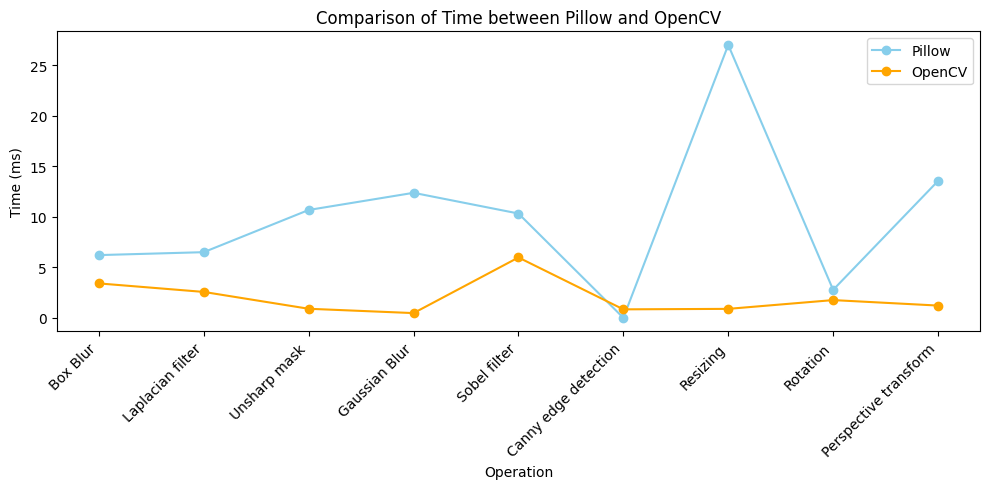

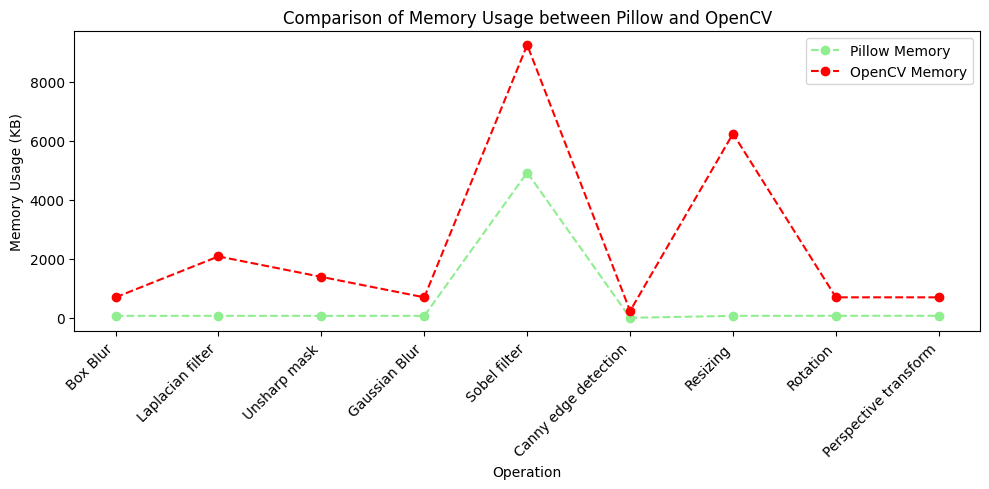

In [162]:
import matplotlib.pyplot as plt

# Списки для збереження вимірювань
operations = ["Box Blur", "Laplacian filter", "Unsharp mask", "Gaussian Blur", "Sobel filter", "Canny edge detection", "Resizing", "Rotation", "Perspective transform"]
times_pillow = [box_blur_time, laplacian_time, unsharp_mask_time, gaussian_blur_time, sobel_time, 0, resizing_time, rotation_time, transform_time_pil]  
times_cv = [box_blur_time_cv, laplacian_time_cv, unsharp_mask_time_cv, gaussian_blur_time_cv, sobel_time_cv, canny_time_cv, resizing_time_cv, rotation_time_cv, transform_time_cv]  
memories_pillow = [box_blur_memory, laplacian_memory, unsharp_mask_memory, gaussian_blur_memory, sobel_memory, 0, resizing_memory, rotation_memory, transform_memory_pil] 
memories_cv = [box_blur_memory_cv, laplacian_memory_cv, unsharp_mask_memory_cv, gaussian_blur_memory_cv, sobel_memory_cv, canny_memory_cv, resizing_memory_cv, rotation_memory_cv, transform_memory_cv]

# Побудова графіку для часу виконання
plt.figure(figsize=(10, 5))
plt.plot(operations, times_pillow, marker='o', color='skyblue', label='Pillow')
plt.plot(operations, times_cv, marker='o', color='orange', label='OpenCV')
plt.xlabel('Operation')
plt.ylabel('Time (ms)')
plt.title('Comparison of Time between Pillow and OpenCV')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Побудова графіку для використання пам'яті
plt.figure(figsize=(10, 5))
plt.plot(operations, memories_pillow, marker='o', color='lightgreen', linestyle='dashed', label='Pillow Memory')
plt.plot(operations, memories_cv, marker='o', color='red', linestyle='dashed', label='OpenCV Memory')
plt.xlabel('Operation')
plt.ylabel('Memory Usage (KB)')
plt.title('Comparison of Memory Usage between Pillow and OpenCV')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Спробуємо 2 зображення (2000x2000, 1024x1024) і порівняємо як себе поводять на операції box blur

In [148]:
def apply_box_blur(img, radius):
    return img.filter(ImageFilter.BoxBlur(radius))
# Завантаження зображення
img = Image.open('imgbigger.jpeg')

# Вимірювання для застосування Box Blur
box_blur_img1, box_blur_time1, box_blur_memory1 = measure_performance(apply_box_blur, img, 3)
print(f"PIL Box Blur 1024x1024 - Час виконання: {box_blur_time1:.2f} мс, Використання пам'яті: {box_blur_memory1:.2f} КБ")

# Завантаження зображення
img = Image.open('imgbiggest.jpg')

# Вимірювання для застосування Box Blur
box_blur_img2, box_blur_time2, box_blur_memory2 = measure_performance(apply_box_blur, img, 3)
print(f"PIL Box Blur 2000x2000 - Час виконання: {box_blur_time2:.2f} мс, Використання пам'яті: {box_blur_memory2:.2f} КБ")

PIL Box Blur 1024x1024 - Час виконання: 23.58 мс, Використання пам'яті: 132.24 КБ
PIL Box Blur 2000x2000 - Час виконання: 119.68 мс, Використання пам'яті: 132.21 КБ


In [149]:
import cv2

# Функція для застосування середнього розмиття (Box Blur)
def apply_box_blur(img, kernel_size):
    return cv2.blur(img, kernel_size)

# Завантаження зображення
img = cv2.imread('imgbigger.jpeg')

# Розмір ядра (вікна) для Box Blur
kernel_size = (7, 7)  # розмір 7x7

# Виклик функції для вимірювання
box_blur_img_cv1, box_blur_time_cv1, box_blur_memory_cv1 = measure_performance(apply_box_blur, img, kernel_size)

# Вивід результатів
print(f"OpenCV Box Blur 1024x1024 - Час виконання: {box_blur_time_cv1:.2f} мс, Використання пам'яті: {box_blur_memory_cv1:.2f} КБ")

# Завантаження зображення
img = cv2.imread('imgbiggest.jpg')

# Розмір ядра (вікна) для Box Blur
kernel_size = (7, 7)  # розмір 7x7

# Виклик функції для вимірювання
box_blur_img_cv2, box_blur_time_cv2, box_blur_memory_cv2 = measure_performance(apply_box_blur, img, kernel_size)

# Вивід результатів
print(f"OpenCV Box Blur 2000x2000- Час виконання: {box_blur_time_cv2:.2f} мс, Використання пам'яті: {box_blur_memory_cv2:.2f} КБ")

OpenCV Box Blur 1024x1024 - Час виконання: 2.46 мс, Використання пам'яті: 3145.82 КБ
OpenCV Box Blur 2000x2000- Час виконання: 9.02 мс, Використання пам'яті: 12000.10 КБ


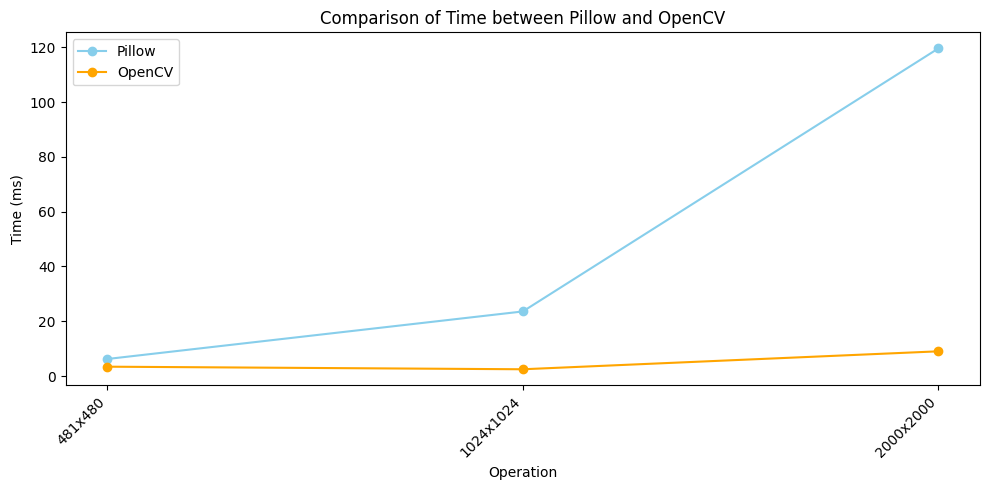

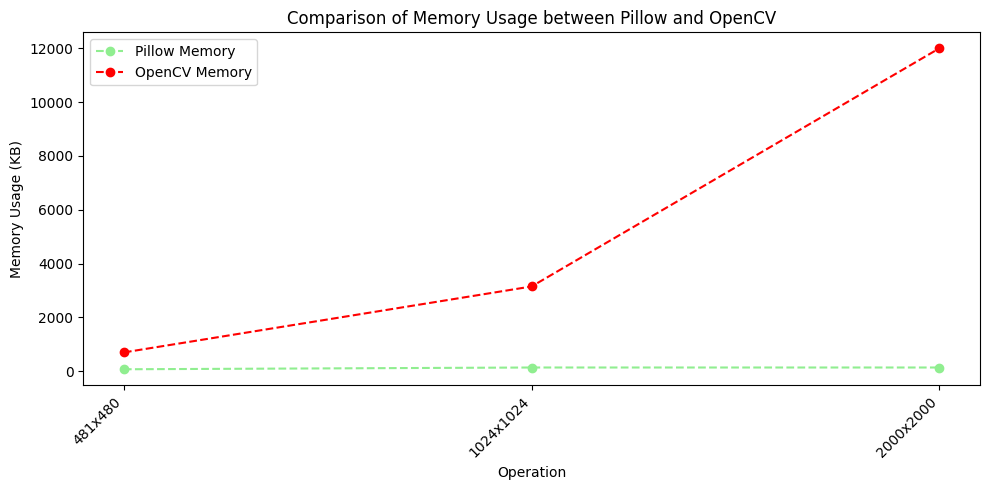

In [150]:
import matplotlib.pyplot as plt

# Списки для збереження вимірювань
resolution = ["481x480", "1024x1024", "2000x2000"]
times_pillow = [box_blur_time, box_blur_time1, box_blur_time2]
times_cv = [box_blur_time_cv, box_blur_time_cv1, box_blur_time_cv2]
memories_pillow = [box_blur_memory, box_blur_memory1, box_blur_memory2]
memories_cv = [box_blur_memory_cv, box_blur_memory_cv1, box_blur_memory_cv2]

# Побудова графіку для часу виконання
plt.figure(figsize=(10, 5))
plt.plot(resolution, times_pillow, marker='o', color='skyblue', label='Pillow')
plt.plot(resolution, times_cv, marker='o', color='orange', label='OpenCV')
plt.xlabel('Operation')
plt.ylabel('Time (ms)')
plt.title('Comparison of Time between Pillow and OpenCV')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Побудова графіку для використання пам'яті
plt.figure(figsize=(10, 5))
plt.plot(resolution, memories_pillow, marker='o', color='lightgreen', linestyle='dashed', label='Pillow Memory')
plt.plot(resolution, memories_cv, marker='o', color='red', linestyle='dashed', label='OpenCV Memory')
plt.xlabel('Operation')
plt.ylabel('Memory Usage (KB)')
plt.title('Comparison of Memory Usage between Pillow and OpenCV')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [151]:
pip install opencv-python scikit-learn

Note: you may need to restart the kernel to use updated packages.


Метод порогової сегментації за допомогою OpenCV

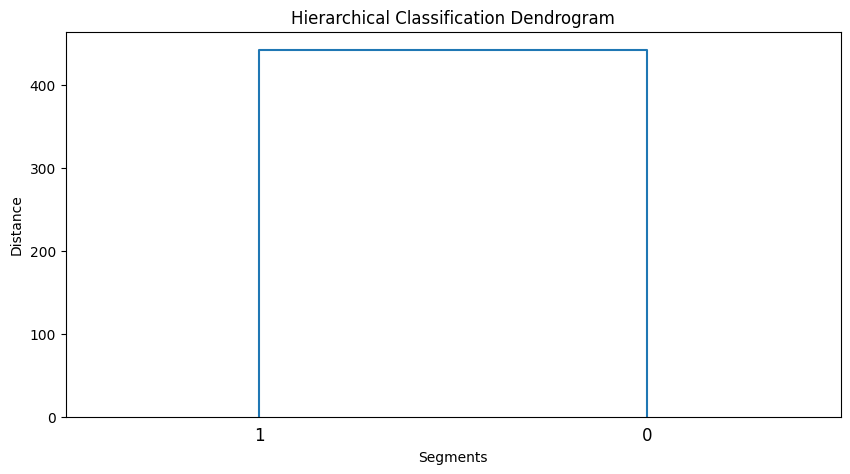

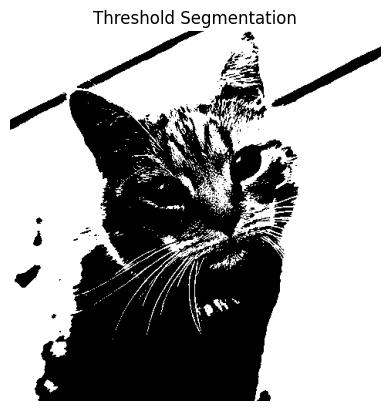

In [158]:
import cv2
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Порогова сегментація
_, segmented_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Побудова ієрархії класифікації
segment_ids = np.unique(segmented_img)
segment_count = len(segment_ids)

# Формування даних для класифікації
data = np.zeros((segment_count, 3))
for i, segment_id in enumerate(segment_ids):
    data[i] = np.array([segment_id, segment_id, segment_id])

# Побудова ієрархії
linked = linkage(data, 'single')

# Відображення дендрограми
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Classification Dendrogram')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Візуалізація результату
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')
plt.title('Threshold Segmentation')
plt.show()

Метод кластеризації k-means за допомогою бібліотеки scikit-learn та ієрархія класів

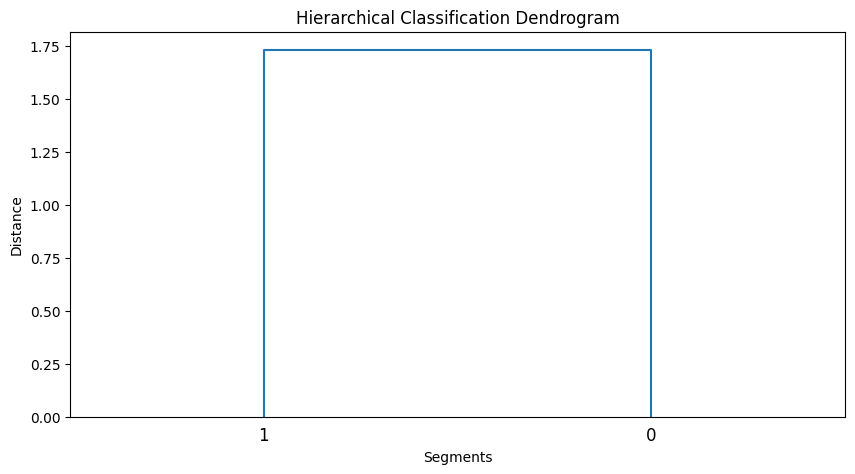

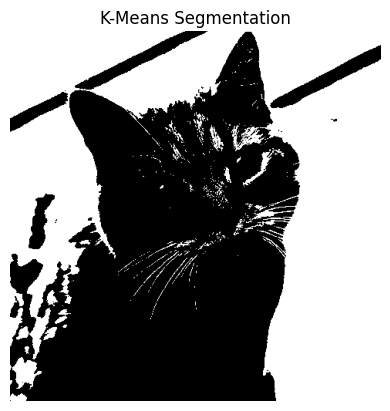

In [159]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Підготовка даних для k-means
pixels = img.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
segmented_img = kmeans.labels_.reshape(img.shape[:2])

segment_ids = np.unique(segmented_img)
segment_count = len(segment_ids)

# Формування даних для класифікації
data = np.zeros((segment_count, 3))
for i, segment_id in enumerate(segment_ids):
    data[i] = np.array([segment_id, segment_id, segment_id])

# Побудова ієрархії
linked = linkage(data, 'single')

# Відображення дендрограми
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Classification Dendrogram')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Візуалізація результату
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')
plt.title('K-Means Segmentation')
plt.show()

 Немає простого методу в OpenCV або scikit-learn, що автоматично забезпечує ієрархічну сегментацію. Використаємо бібліотеку skimage для цього

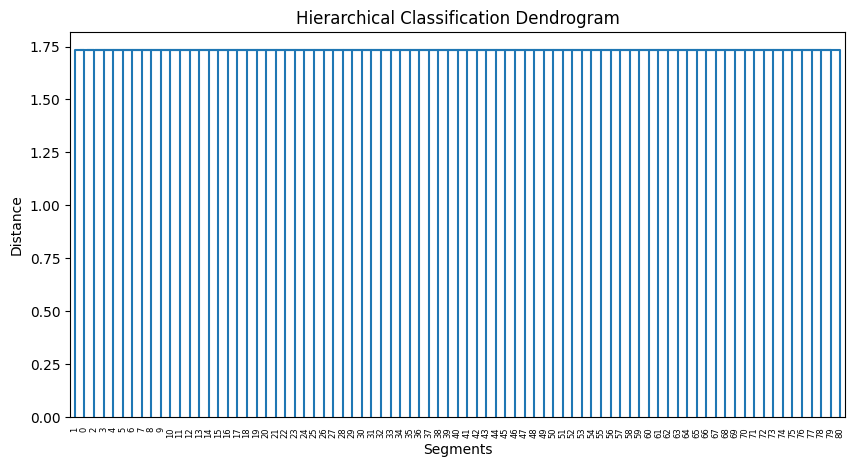

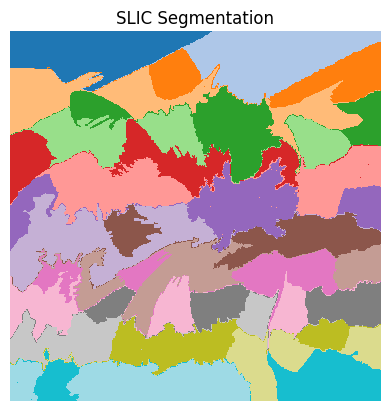

In [160]:
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Завантаження зображення
image_path = 'img.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Сегментація за допомогою SLIC
segments = slic(img, n_segments=100, compactness=10)

# Побудова ієрархії класифікації
segment_ids = np.unique(segments)
segment_count = len(segment_ids)

# Формування даних для класифікації
data = np.zeros((segment_count, 3))
for i, segment_id in enumerate(segment_ids):
    data[i] = np.array([segment_id, segment_id, segment_id])

# Побудова ієрархії
linked = linkage(data, 'single')

# Відображення дендрограми
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Classification Dendrogram')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Візуалізація результату
plt.imshow(segments, cmap='tab20')
plt.axis('off')
plt.title('SLIC Segmentation')
plt.show()
